# AMATH 515 Homework 4

**Due Date: 03/23/2019**

* Name:
* Student Number:

*Homework Instruction*: Please follow order of this notebook and fill in the codes where commented as `TODO`.

In [82]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
import numpy as np
import matplotlib.pyplot as plt

## Please complete the code in `solvers.py`

In [94]:
from solvers import optimizeWithIP, optimizeWithCP

## Interior Point Method

Consider the problem that minimize a quadratic objective over a box constraint,

$$
\min_x~\frac{1}{2}\|Ax - b\|^2, \quad \text{s.t.}~l \le x \le u
$$

* providing $l$ and $u$, convert the constraint $l \le x \le u$ to the form of $Cx \le d$.
* use the test case to test the code

In [85]:
np.random.seed(123)
m = 20
n = 10
l = np.zeros(n)
u = np.ones(n)
#
A  = np.random.randn(m, n)
xt = -np.random.rand(n)
b  = A.dot(xt)

In [86]:
# TODO: create C and d used for the solver
C = np.vstack((-np.eye(n), np.eye(n)))
d = np.concatenate((-l, u))

In [87]:
x0_ip = 0.5*(l + u)
x_ip, obj_his_ip, err_his_ip, exit_flag_ip = optimizeWithIP(x0_ip, A, b, C, d)

In [88]:
from jupyterthemes import jtplot
jtplot.style()

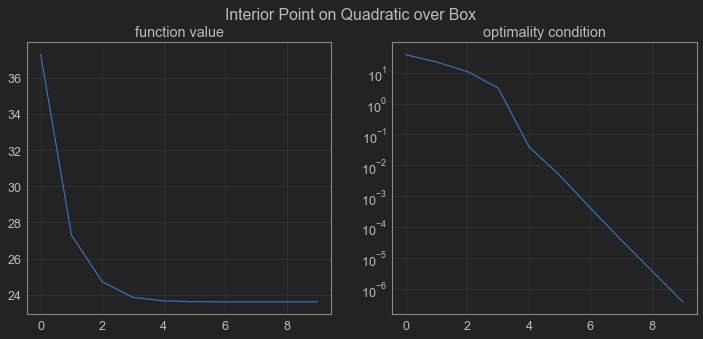

In [89]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_ip)
ax[0].set_title('function value')
ax[1].semilogy(err_his_ip)
ax[1].set_title('optimality condition')
fig.suptitle('Interior Point on Quadratic over Box')
plt.show()

## Chambolle-Pock Algorithm

Consider problem,
$$
\min_x~\|Ax - b\|_1 + \|x\|_1
$$

* relate this problem to our general template, namely figure out what are $c$, $h$ and $k$.
* solve the problem using Chambolle-Pock Algorithm

In [110]:
np.random.seed(123)
m = 100
n = 200
k = 10
#
A  = np.random.randn(m, n)
xt = np.zeros(n)
xt[np.random.choice(n, k, replace=False)] = np.random.choice([-1.0, 1.0], k)
b  = A.dot(xt)
#
lam = 0.1

In [115]:
from numpy.linalg import norm

In [116]:
# TODO: define c and function h, k, prox_ch, prox_k
c = np.zeros(n)
#
def h(x):
    return norm(x, 1)
def k(x):
    return lam*norm(x, 1)
#
def prox_ch(z, t):
    return z.clip(-1, 1)
    
def prox_k(z, t):
    return (z - t*lam).clip(0, None) - (- z - t*lam).clip(0, None)

In [117]:
x0_cp = np.zeros(n)
x_cp, obj_his_cp, err_his_cp, exit_flag_cp = optimizeWithCP(x0_cp, A, b, c, h, k, prox_ch, prox_k)

Text(0.5, 0.98, 'Chambolle-Pock on LAD-Lasso')

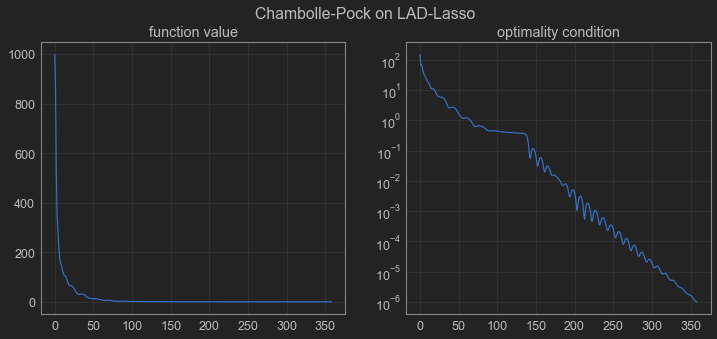

In [118]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_cp)
ax[0].set_title('function value')
ax[1].semilogy(err_his_cp)
ax[1].set_title('optimality condition')
fig.suptitle('Chambolle-Pock on LAD-Lasso')

Text(0.5, 1.0, 'signal recovery')

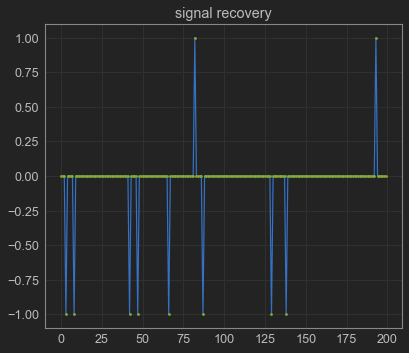

In [119]:
plt.plot(xt)
plt.plot(x_cp, '.')
plt.title('signal recovery')